# Ellipsoidal nested sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data.

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

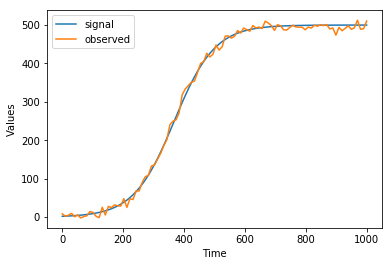

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedController(log_likelihood, log_prior, method=pints.NestedEllipsoidSampler)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested ellipsoidal rejection sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate
0     1       0:00.0 -inf          1             
0     2       0:00.0 -inf          1             
0     3       0:00.0 -inf          1             
0     4       0:00.0 -inf          1             
0     5       0:00.0 -inf          1             
0     21      0:00.0 -inf          1             
0     41      0:00.0 -inf          1             
0     61      0:00.0 -inf          1             
0     81      0:00.0 -inf          1             
0     101     0:00.0 -inf          1             
0     121     0:00.0 -inf          1             
0     141     0:00.0 -inf          1             
0     161     0:00.0 -inf          1             
0     181     0:00.0 -inf          1             
0     201     0:00.0 -inf          1             
0     221     0:00.0 -inf          1             
0  

c:\users\bclamber\desktop\pints\pints\_log_likelihoods.py:480: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


1260  2236    0:01.4 -367.3882788  0.468954248366
1280  2285    0:01.5 -350.4203184  0.467374005305
1300  2324    0:01.5 -330.15968    0.468295218   
1320  2349    0:01.6 -313.024235   0.472550026   
1340  2388    0:01.6 -295.1108607  0.47334004    
1360  2423    0:01.7 -292.2049334  0.475037073653
1380  2469    0:01.7 -279.4858154  0.474142098   
1400  2518    0:01.7 -264.2778595  0.472615675   
1420  2562    0:01.8 -248.8188485  0.472247919   
1440  2614    0:01.8 -240.0505853  0.470189701897
1460  2658    0:01.8 -228.9249912  0.469884853853
1480  2719    0:01.9 -221.0751996  0.466149202   
1500  2764    0:01.9 -208.4778839  0.465736041   
1520  2799    0:01.9 -198.8609676  0.467278033   
1540  2834    0:02.0 -191.9838806  0.468775678   
1560  2881    0:02.0 -182.5122157  0.467956469   
1580  2927    0:02.0 -175.1449961  0.467352592   
1600  2972    0:02.1 -170.0004912  0.466951788   
1620  3023    0:02.1 -164.4540988  0.465497522   
1640  3080    0:02.2 -157.7959951  0.463059701   


4640  8096    0:06.8 -7.364382122  0.551065489   
4660  8123    0:06.9 -7.218520291  0.551728603   
4680  8157    0:06.9 -7.004675772  0.551888617   
4700  8191    0:06.9 -6.797435504  0.552047234   
4720  8221    0:07.0 -6.598346308  0.552486894259
4740  8255    0:07.0 -6.401731265  0.55264163    
4760  8288    0:07.0 -6.207740963  0.552865112   
4780  8317    0:07.0 -6.021368523  0.553366174   
4800  8349    0:07.1 -5.843630828  0.553654548   
4820  8375    0:07.1 -5.673132055  0.554357367   
4840  8407    0:07.1 -5.50488133   0.554639690271
4860  8436    0:07.2 -5.339347504  0.555126929   
4880  8469    0:07.2 -5.174925783  0.555335234   
4900  8498    0:07.2 -5.012786231  0.555816251   
4920  8529    0:07.3 -4.852646493  0.556156969   
4940  8561    0:07.3 -4.689625548  0.556426908   
4960  8590    0:07.3 -4.53096545   0.556898657   
4980  8620    0:07.4 -4.376211972  0.557299270073
5000  8655    0:07.4 -4.223787731  0.557359176   
5020  8682    0:07.4 -4.076853233  0.557957015   


## Plot posterior samples versus true parameter values (dashed lines)

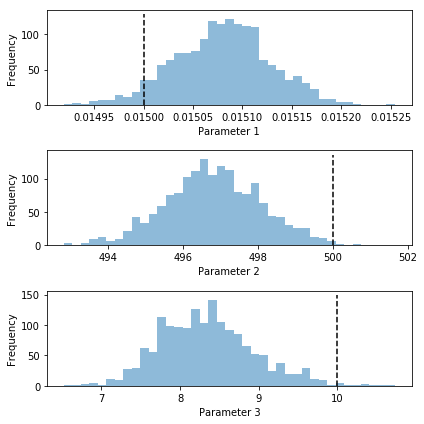

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

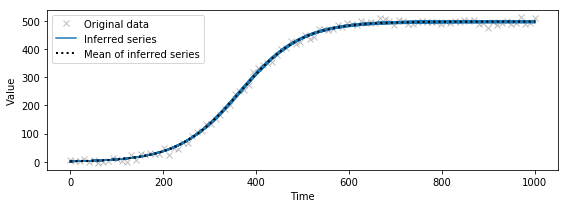

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -365.225125745 ± 0.0805224272726


## Effective sample size

In [7]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 1618.99733966
